In [1]:
import pandas as pd
import numpy as np
import pickle

import altair as alt
from functools import reduce
from sklearn.cluster import KMeans

# importing local libraries for drawings (because they clutter)
# in Github, you can search  
#   They should still be available within the git repo but it's pretty much template stuff from altair
import sys
sys.path.append('../')
from lib.builders import locators,towns,nations,culture as c
import lib.drawMaps as draw

with (open('world_1.p', 'rb')) as pickle_file:
    world = pickle.load(pickle_file)
    
world

In [2]:
culture = c.Culture()
culture.eons

10

# The age of the ancients

the terrain and all of the natural features are formed in the first age. Mountains, rivers, lakes, forrests. Once the land has settle, the first cities appear. 

Culture settings come from the user input, there are defaults for everything. Once specified the `.culture` placeholder can be replaced. It should not be used until this point. 

In [3]:
world.culture = culture

#### Blank world from the `landscape` age

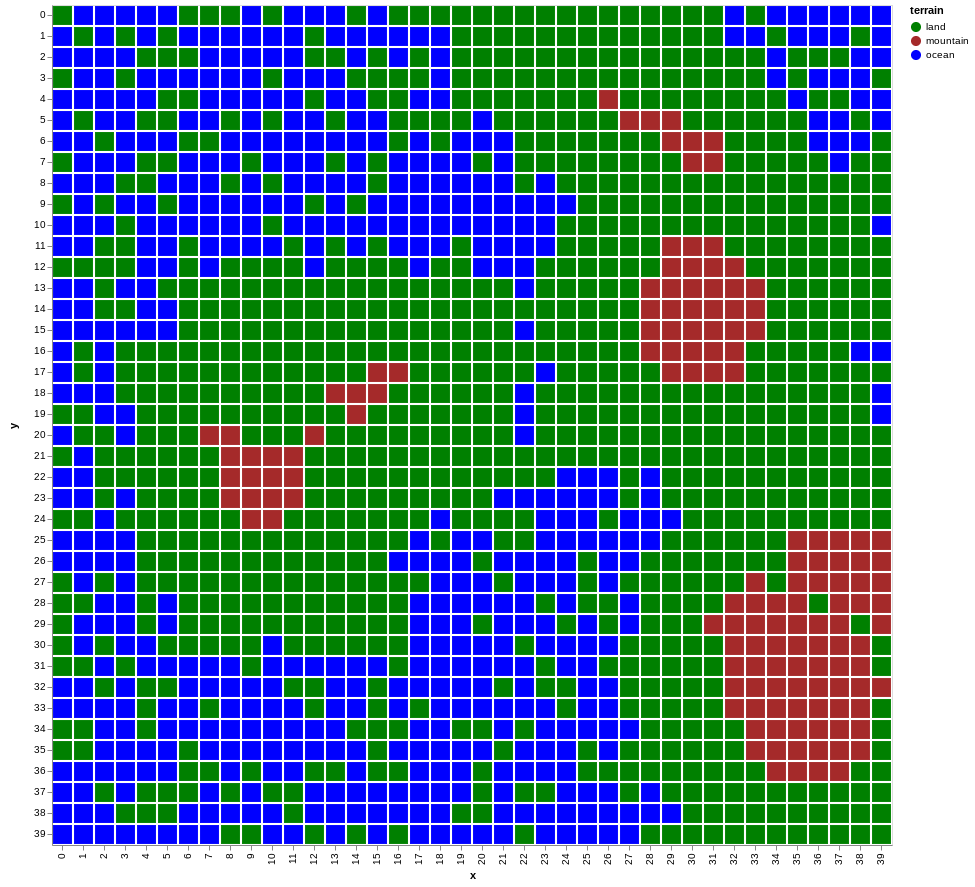

In [4]:
draw.drawTerrainTypes(world.grid_elevation,world.landscape)

the `__init__` method of a city takes a founding age and a location (which can be generated randomly via `World.get_random_chord`). The init method automatically generates a name. The default nation is the name of the town.

In [5]:
new_town = towns.Town(world.get_random_chord(),1,culture)
new_town

town of Fallbrook: population: 1 location: [29,15] founded 1

## The age of civilization

Cities grow for a set number of aeons. During each eon
* n new villages are born
* each village has g% chance to grow

at the end of this age cities merge together to become nations. 

In [6]:
all_towns = towns.build_towns(world)
all_towns

[town of Godcrawl: population: 6 location: [28,28] founded 0,
 town of Ragebrook: population: 5 location: [6,22] founded 0,
 town of Founder'sspike: population: 6 location: [34,6] founded 0,
 town of Snakemoral: population: 3 location: [12,13] founded 1,
 town of Magerail: population: 4 location: [34,32] founded 1,
 town of Snakemore: population: 4 location: [21,13] founded 2,
 town of Malgarden: population: 2 location: [32,5] founded 2,
 town of King'scoil: population: 3 location: [18,23] founded 3,
 town of Warcoil: population: 3 location: [5,32] founded 3,
 town of Godford: population: 1 location: [10,24] founded 4,
 town of Gleamspring: population: 1 location: [3,31] founded 4,
 town of Solrail: population: 4 location: [37,34] founded 4,
 town of Watercatch: population: 1 location: [19,19] founded 4,
 town of Doomglen: population: 3 location: [37,39] founded 5,
 town of Hellpike: population: 4 location: [34,5] founded 5,
 town of Fallhost: population: 3 location: [38,18] founded 6,

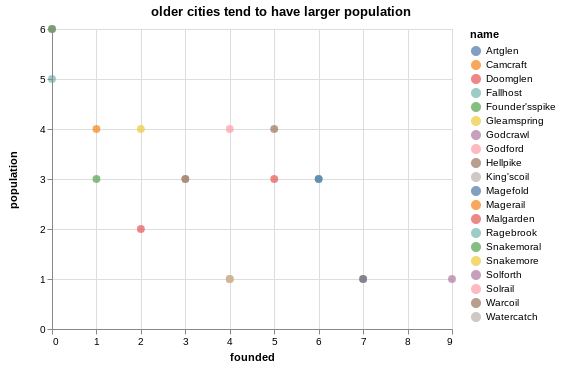

In [7]:
def population_age(towns):
    df = pd.DataFrame(index=range(len(all_towns)))
    df['name'] = [t.name for t in all_towns]
    df['population'] = [t.pop for t in all_towns]
    df['founded'] = [t.founded for t in all_towns]
    return df

alt.Chart(population_age(towns),title="older cities tend to have larger population").mark_circle(size=60).encode(
    y='population',
    x='founded',
    color='name',
    tooltip=['name']
)

There are convinience functions to fetch individual towns. 

In [8]:
towns.get_town(all_towns,all_towns[2].name)

town of Founder'sspike: population: 6 location: [34,6] founded 0

In [9]:
world.df_features.head()

,y,rainfall,x,key,elevation,terrain
key,,,,,,
0:0,0,7.0,0,0:0,1.0,land
1:0,0,6.0,1,1:0,-1.0,ocean
2:0,0,7.0,2,2:0,-1.0,ocean
3:0,0,12.0,3,3:0,0.0,ocean
4:0,0,11.0,4,4:0,0.0,ocean


In [10]:
world.add_features(all_towns)

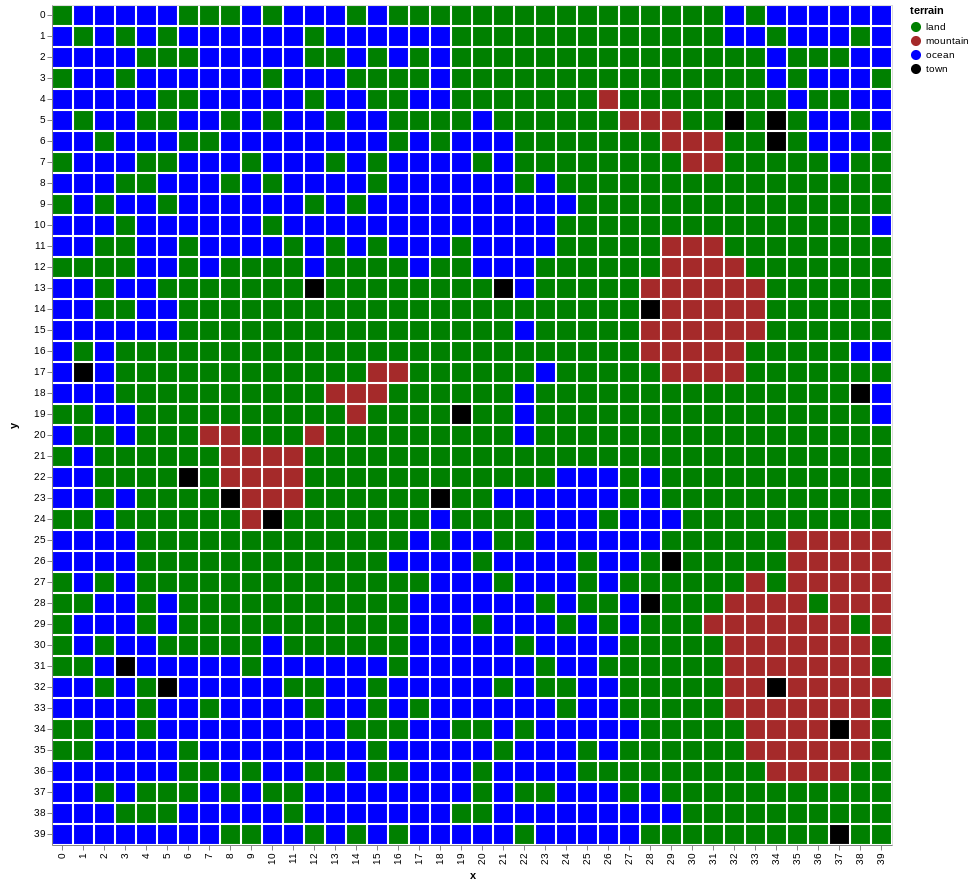

In [11]:
draw.drawCities(world.df_features)

In [12]:
world.df_features[world.df_features['feature'].isna()==False]

,y,rainfall,x,key,elevation,terrain,feature
key,,,,,,,
32:5,5,42.0,32,32:5,15.0,town,Malgarden
34:5,5,26.0,34,34:5,4.0,town,Hellpike
34:6,6,27.0,34,34:6,6.0,town,Founder'sspike
12:13,13,65.0,12,12:13,4.0,town,Snakemoral
21:13,13,14.0,21,21:13,2.0,town,Snakemore
28:14,14,32.0,28,28:14,32.0,town,Magefold
1:17,17,39.0,1,1:17,1.0,town,Solforth
38:18,18,1.0,38,38:18,1.0,town,Fallhost
19:19,19,16.0,19,19:19,9.0,town,Watercatch


In [13]:
#k is the actual k_means cluster object.
all_nations,k = nations.cluster_nations(world)

world.nations = all_nations

all_nations

{0: "Land'schild",
 1: "Founder'shaven",
 2: 'Clearwish',
 3: 'Flamepike',
 4: 'Rockhollow',
 5: "Land'sfort",
 6: 'Lilymain',
 7: 'Waterfold'}

In [14]:
k

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
world.df_features = nations.predict_nations(k,world)
world.df_features.head(20)

,y,rainfall,x,key,elevation,terrain,feature,nation number,nation
key,,,,,,,,,
0:0,0,7.0,0,0:0,1.0,land,NaN,2.0,Clearwish
1:0,0,6.0,1,1:0,-1.0,ocean,NaN,NaN,NaN
2:0,0,7.0,2,2:0,-1.0,ocean,NaN,NaN,NaN
3:0,0,12.0,3,3:0,0.0,ocean,NaN,NaN,NaN
4:0,0,11.0,4,4:0,0.0,ocean,NaN,NaN,NaN
5:0,0,11.0,5,5:0,0.0,ocean,NaN,NaN,NaN
6:0,0,11.0,6,6:0,1.0,land,NaN,4.0,Rockhollow
7:0,0,12.0,7,7:0,1.0,land,NaN,4.0,Rockhollow
8:0,0,18.0,8,8:0,1.0,land,NaN,4.0,Rockhollow


In [16]:
for t in all_towns:
    try:
        t.set_starting_fielty(world)
    except:
        continue
        
t.diplomacy

{'nation': 'Clearwish', 'national fealty': 1}

In [17]:
#for each nation (n), appoint the most populus city (c) as it's capitol.
for n in np.unique(world.df_features['nation'].dropna()):
    c = world.df_features[(world.df_features['nation']==n)& \
          (world.df_features['terrain']=='town')]['feature'].tolist()
    #getting the town objects
    ts = [t for t in all_towns if t.name in c]
    #get population(p)
    p = [t.pop for t in ts]
    #getting the first town that has the max population, make that the capitol
    ts[np.argmax(p)].type='capitol'
    
all_towns

[capitol of Godcrawl: population: 6 location: [28,28] founded 0,
 capitol of Ragebrook: population: 5 location: [6,22] founded 0,
 capitol of Founder'sspike: population: 6 location: [34,6] founded 0,
 town of Snakemoral: population: 3 location: [12,13] founded 1,
 capitol of Magerail: population: 4 location: [34,32] founded 1,
 capitol of Snakemore: population: 4 location: [21,13] founded 2,
 town of Malgarden: population: 2 location: [32,5] founded 2,
 town of King'scoil: population: 3 location: [18,23] founded 3,
 capitol of Warcoil: population: 3 location: [5,32] founded 3,
 town of Godford: population: 1 location: [10,24] founded 4,
 town of Gleamspring: population: 1 location: [3,31] founded 4,
 town of Solrail: population: 4 location: [37,34] founded 4,
 town of Watercatch: population: 1 location: [19,19] founded 4,
 town of Doomglen: population: 3 location: [37,39] founded 5,
 town of Hellpike: population: 4 location: [34,5] founded 5,
 capitol of Fallhost: population: 3 locatio

In [18]:
world.df_features[world.df_features['feature'].isna()==False].sort_values(['nation'])

,y,rainfall,x,key,elevation,terrain,feature,nation number,nation
key,,,,,,,,,
6:22,22,30.0,6,6:22,14.0,town,Ragebrook,2.0,Clearwish
10:24,24,36.0,10,10:24,25.0,town,Godford,2.0,Clearwish
8:23,23,32.0,8,8:23,25.0,town,Artglen,2.0,Clearwish
1:17,17,39.0,1,1:17,1.0,town,Solforth,2.0,Clearwish
32:5,5,42.0,32,32:5,15.0,town,Malgarden,3.0,Flamepike
34:6,6,27.0,34,34:6,6.0,town,Founder'sspike,3.0,Flamepike
34:5,5,26.0,34,34:5,4.0,town,Hellpike,3.0,Flamepike
37:34,34,37.0,37,37:34,37.0,town,Solrail,1.0,Founder'shaven
34:32,32,36.0,34,34:32,36.0,town,Magerail,1.0,Founder'shaven


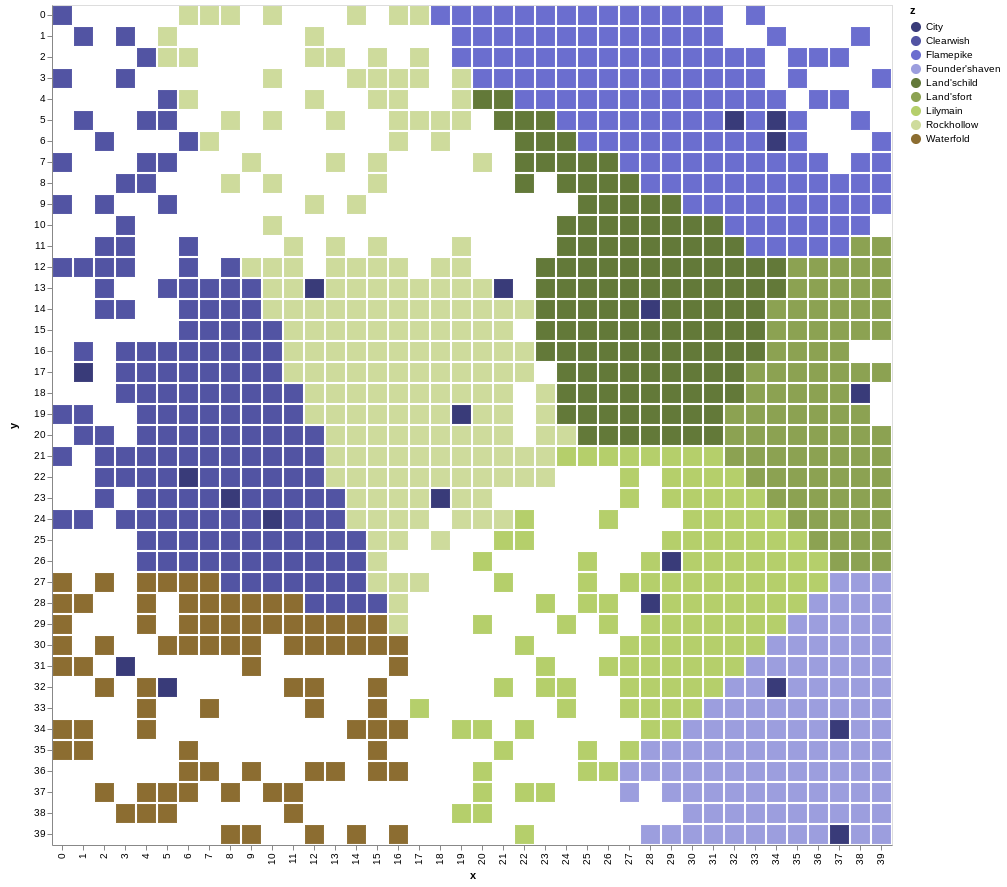

In [19]:
draw.drawboarders(world.df_features)

In [20]:
with open('world_2.p', 'wb') as pickle_file:
    pickle.dump(world, pickle_file)